A Lazy Analysis of Ohio School District Performance vs Money Spent
------------------------------------------------------------------

This is a careless, back-seat driver look a few files from the [Ohio School Report Card datasets](https://reportcard.education.ohio.gov/download). One could do a much more responsible analysis of these data.

Ohio's "Performance Index" is an imperfect single scalar value for academic performance of a school or district. Again because I am lazy, I am using it as measure of the overall quality of education provided by the district despite the weaknesses of this measure. See [Ohio Report Cards](https://reportcard.education.ohio.gov) for definitions.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
# pick 2022-2023 school year and download a few spreadsheet that are possible relevant.
rankings=pd.read_excel(io='pi_rankings_2023.xlsx',sheet_name=1)
rankings.set_index('LEA IRN',inplace=True)
expenditures=pd.read_excel(io='2223_DISTRICT_SPEND_PER_PUPIL.xlsx',sheet_name=1)
expenditures.set_index('District IRN', inplace=True)
eco_temp=pd.read_excel(io='2223_DIST_ECON_DIS.xlsx',sheet_name=1)
# above has two rows per district, knock out the "not economically disadvantaged", which is
# 1 - p in most cases. (Exceptions: fewer than 10 student in either group disables reporting)
eco_dis=eco_temp.loc[eco_temp["Student Group"]=="ECONDISADV"]
eco_dis.set_index('District IRN', inplace=True)

In [11]:
# To protect student privacy, Ohio doesn't report any subgroup where the number of students is below 10.
# We don't care in this case, because we are looking at district-wide data and not the performance of
# those individual subgroups. Some districts have fewer than 10 students who are economically disadvantaged;
# just treat them as zero (close enough).
no_count_zero={"NC":0.0, "<10":0.0}
eco_dis=eco_dis.replace(no_count_zero)

In [12]:
# join those three tables
df=expenditures.join(rankings)
df=df.join(eco_dis, rsuffix='econ')

In [13]:
# Convert string values ("$12,345" etc) to float
df['ExpenditurePEP']=df['Expenditures per Equivalent Pupil'].replace('[\$,]', '', regex=True).astype(float)
df['Performance']=df['2023 PI for Ranking'].astype(float)
df['EcoDis']=df['Percent of Total Enrollment 2022-2023'].astype(float, copy=True)

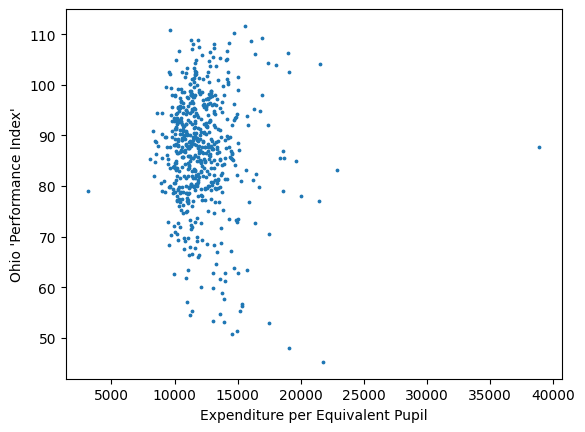

In [14]:
# Expenditure per "Equivalent Pupil". An "Equivalent Pupil" is weighted by attendance,
# economic disadvantage, and special needs. See [Expenditure Per-Pupil Rankings](https://education.ohio.gov/Topics/Finance-and-Funding/Finance-Data-and-Information/Expenditure-Per-Pupil-Rankings)
#
# It is unclear to me what the "State-Level Expenditures per Equivalent Pupil" of $11,916 is. I believe that
# is the statewide mean, not some additional $11,916 expended by the state for every pupil in Ohio (ha ha)
plt.scatter(df['ExpenditurePEP'], df['Performance'],s=3)
plt.xlabel("Expenditure per Equivalent Pupil")
plt.ylabel("Ohio 'Performance Index'")
plt.savefig("Expenditure.png",bbox_inches='tight')

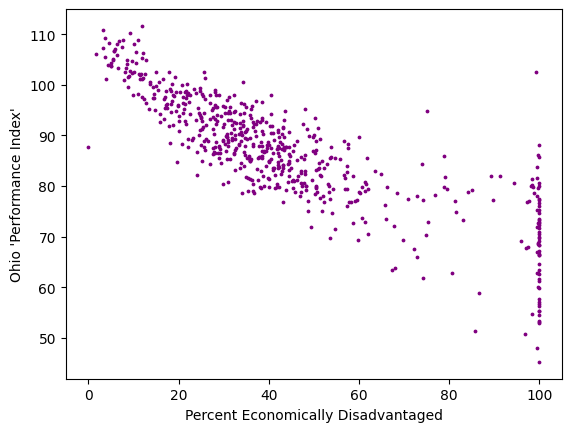

In [15]:
# Use % economically disadvantaged as a proxy for district family income
plt.scatter(df['EcoDis'], df['Performance'],s=3,color=['purple'])
plt.xlabel("Percent Economically Disadvantaged")
plt.ylabel("Ohio 'Performance Index'")
plt.savefig("EcoDis.png",bbox_inches='tight')

In [16]:
# modest income, high-performing districts:
df.loc[(df['EcoDis']>99.0) & (df['Performance']>80)].sort_values('Performance',ascending=False)


,District Name,County,Region,Expenditures per Equivalent Pupil,Expenditures per Equivalent Pupil - Federal Funds,Expenditures per Equivalent Pupil - State and Local Funds,State-Level Expenditures per Equivalent Pupil,State-Level Expenditures per Equivalent Pupil - Federal Funds,State-Level Expenditures per Equivalent Pupil - State and Local Funds,Watermark,...,High School English II 2022-2023 Percent Proficient or above,High School Geometry 2022-2023 Percent Proficient or above,High School Math I 2022-2023 Percent Proficient or above,High School Math II 2022-2023 Percent Proficient or above,Four Year Graduation Rate 2022,Five Year Graduation Rate 2021,Watermarkecon,ExpenditurePEP,Performance,EcoDis
District IRN,,,,,,,,,,,,,,,,,,,,,
44826,Steubenville City,Jefferson,Region 12,"$9,584","$2,548","$7,036","$11,916","$1,499","$10,417",NaN,...,80.6,92.1,0.0,0.0,>95.0,>95.0,NaN,9584.0,102.485,99.3
44248,Logan-Hocking Local,Hocking,Region 16,"$10,029","$1,530","$8,499","$11,916","$1,499","$10,417",NaN,...,59.9,37.8,0.0,0.0,91.3,94.7,NaN,10029.0,88.190,100.0
47928,Dawson-Bryant Local,Lawrence,Region 15,"$9,409","$1,099","$8,310","$11,916","$1,499","$10,417",NaN,...,57.9,31.2,0.0,0.0,>95.0,>95.0,NaN,9409.0,86.188,99.8
47761,Oak Hill Union Local,Jackson,Region 16,"$10,618","$1,239","$9,379","$11,916","$1,499","$10,417",NaN,...,62.2,34.5,0.0,0.0,85.2,90.9,NaN,10618.0,85.724,99.9
44149,Ironton City School District,Lawrence,Region 15,"$9,848","$1,722","$8,126","$11,916","$1,499","$10,417",NaN,...,64.6,23.4,0.0,0.0,>95.0,92.2,NaN,9848.0,83.754,99.4
43778,Claymont City,Tuscarawas,Region 12,"$11,575","$1,585","$9,990","$11,916","$1,499","$10,417",NaN,...,56.5,35.2,0.0,0.0,88.4,90.2,NaN,11575.0,81.629,99.5
48538,Southern Local,Meigs,Region 16,"$9,947",$939,"$9,007","$11,916","$1,499","$10,417",NaN,...,57.6,45.5,0.0,0.0,89.2,>95.0,NaN,9947.0,80.641,100.0
44479,New Lexington School District,Perry,Region 16,"$12,704","$2,006","$10,698","$11,916","$1,499","$10,417",NaN,...,68.5,31.2,0.0,0.0,91.9,94.2,NaN,12704.0,80.004,99.9
